# Starting with KNN Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as pre

In [2]:
# Reading the data
dfx=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\xdata.csv")
dfy=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\ydata.csv")

In [3]:
# Taking the dataset in numpy format and reshaping it according to our needs
X=dfx.values
Y=dfy.values
X=X[:,1:]
Y=Y[:,1:]
Y=Y.reshape(399,)

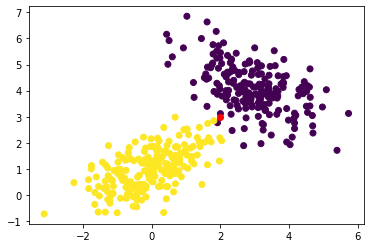

In [4]:
# creating a query point for this demonstration
query_x=np.array([2,3])
#plotting the dataset
plt.scatter(X[:,0],X[:,1],c=Y)
#plotting the query point
plt.scatter(query_x[0],query_x[1],color="red")
plt.show()

In [5]:
#finding the distance/eulerian distance between two vectors/numpy arrays
def find_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [6]:
#defining the main part of the KNN algorithm
def knn(X,Y,query_pt,k=5):
    #creating a list to add all the distances
    vals=[]
    #finding the total number of elements
    m=X.shape[0]
    
    for i in range(m):
        #finding the distance between the query point and every other point in the dataset
        dist=find_dist(query_pt,X[i])
        # adding the distances to the vals list
        vals.append((dist,Y[i]))
    #sorting the list to identify the smallest distances/ points in the vicinity of our query pt
    vals=sorted(vals)
    #taking the first K nearest
    vals=vals[:k]
    #making it a numpy array for easy processing
    vals=np.array(vals)
    #finding the unique values from the second index of the 2Dnumpy array, because it contains the binary
    # classification values
    unique_vals=np.unique(vals[:,1],return_counts=True)
    #finding the index of the largest frequency element
    index=np.argmax(unique_vals[1])
    #returning the final prediction
    return unique_vals[0][index]
    
    

In [7]:
query_pt=[0,0]
pred=knn(X,Y,query_pt)
print(pred)

1.0


## Using KNN on Handwriting Dataset

### 1. Preprocessing the Data

3
7


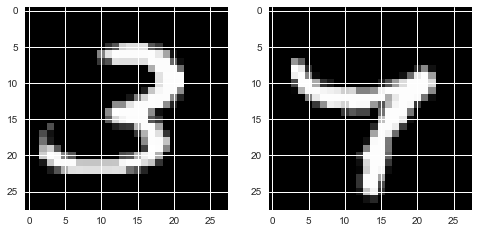

(9999, 785)


In [84]:
df=pd.read_csv(r'D:\dataScience\machine-learning-online-2018-master\Datasets\MNIST-1\train.csv')
df_test=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\MNIST-1\test.csv")
dfx=df.values
dfy=df_test.values

#The datasets extracted values to be actually used
X_train=dfx[:,:784]
Y_train=dfx[:,784]
X_test=dfy[:,:784]
Y_test=dfy[:,784]


#checking with one random example if we aligned the data in proper format
img1=X_train[3284].reshape((28,28))
img2=X_test[123].reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img1,cmap='gray')
print(Y_train[3284])
plt.subplot(1,2,2)
plt.imshow(img2,cmap='gray')
print(Y_test[123])
plt.show()
print(dfy.shape)

In [88]:
def drawImg(inp):
    inp=inp.reshape((28,28))
    plt.imshow(inp,cmap="gray")
    plt.show()

### 2. Make Predictions

In [97]:
pred=knn(X_train,Y_train,X_test[201])
print(pred)

1.0


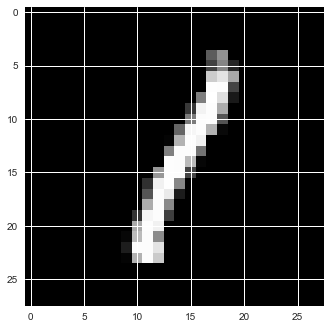

In [98]:
drawImg(X_test[201])

### 3. Finding Accuracy

In [99]:
#we are only testing on 10 sample cases as it is taking a lot of time to check due to high time complexity 
# of the algorithm and with the big size of the testing data
total=10#X_test.shape[0]
right_pred=0
for i in range(total):
    pred=knn(X_train,Y_train,X_test[i])
    actual=Y_test[i]
    if actual==pred:
        right_pred+=1
acc=(right_pred*100)/total
print(acc)

100.0


# Using KNN on Diabetes Classification Dataset

### 1. Data Processing

In [27]:
#reading data from the location
X_train=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\KNNDiabetes\Diabetes_XTrain.csv")
Y_train=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\KNNDiabetes\Diabetes_YTrain.csv")
X_train.head(10)
X_train=X_train.values
normalizer=pre.Normalizer()
X_train = normalizer.fit_transform(X_train)

In [28]:
Y_train.head(10)

,Outcome
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


In [29]:
# extracting and reshaping the training data set
Y_train=Y_train.values
Y_train=Y_train.reshape(Y_train.shape[0],)

# extracting and processing the test data set

X_test=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\KNNDiabetes\Diabetes_XTest.csv")
X_test=X_test.values

### 2. Calculating the Predictions

In [36]:
m=X_test.shape[0]
predictions=[]
# iterating over X_test for using KNN
for i in range(m):
    pred=int(knn(X_train,Y_train,X_test[i],11))
    predictions.append(pred)
#converting to a numpy array
preds=np.array(predictions)
preds={"Outcome":preds}
final=pd.DataFrame(preds)
final.to_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\KNNDiabetes\Diabetes_YTest.csv",index=False)


In [37]:
df=pd.read_csv(r"D:\dataScience\machine-learning-online-2018-master\Datasets\KNNDiabetes\Diabetes_YTest.csv")
df.head(10)

,Outcome
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0
